<a href="https://colab.research.google.com/github/YassineZITI/IT-or-Not-Books-/blob/main/IT_or_not_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#we need good reads data to use it as not it books
#we wanna build a model that classify books to it or not books based on their descriptions
!wget https://raw.githubusercontent.com/scostap/goodreads_bbe_dataset/main/Best_Books_Ever_dataset/books_1.Best_Books_Ever.csv

--2022-07-01 23:45:59--  https://raw.githubusercontent.com/scostap/goodreads_bbe_dataset/main/Best_Books_Ever_dataset/books_1.Best_Books_Ever.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73839808 (70M) [text/plain]
Saving to: ‘books_1.Best_Books_Ever.csv’

books_1.Best_Books_ 100%[===================>]  70.42M   209MB/s    in 0.3s    

2022-07-01 23:46:00 (209 MB/s) - ‘books_1.Best_Books_Ever.csv’ saved [73839808/73839808]



In [ ]:
import pandas as pd
goodreads_df = pd.read_csv('/content/books_1.Best_Books_Ever.csv')


In [ ]:
goodreads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

In [ ]:
goodreads_df['genres'].values

array(["['Young Adult', 'Fiction', 'Dystopia', 'Fantasy', 'Science Fiction', 'Romance', 'Adventure', 'Teen', 'Post Apocalyptic', 'Action']",
       "['Fantasy', 'Young Adult', 'Fiction', 'Magic', 'Childrens', 'Adventure', 'Audiobook', 'Middle Grade', 'Classics', 'Science Fiction Fantasy']",
       "['Classics', 'Fiction', 'Historical Fiction', 'School', 'Literature', 'Young Adult', 'Historical', 'Novels', 'Read For School', 'High School']",
       ...,
       "['Fantasy', 'Young Adult', 'Paranormal', 'Angels', 'Romance', 'Demons', 'Supernatural', 'Paranormal Romance', 'Urban Fantasy', 'Fiction']",
       "['Fiction', 'Mystery', 'Historical Fiction', 'Adventure', 'Christian Fiction', 'Historical', 'Religion', 'Suspense', 'Christian', 'Archaeology']",
       "['Lds Fiction', 'Historical Fiction', 'Young Adult', 'Fiction', 'Fantasy', 'Lds', 'Historical', 'Romance', 'Adventure', 'Teen']"],
      dtype=object)

In [ ]:
df = goodreads_df[['title','language','description','genres']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        52478 non-null  object
 1   language     48672 non-null  object
 2   description  51140 non-null  object
 3   genres       52478 non-null  object
dtypes: object(4)
memory usage: 1.6+ MB


In [ ]:
df['language'].unique()

array(['English', 'French', 'German', 'Persian', 'Arabic', nan, 'Spanish',
       'Multiple languages', 'Portuguese', 'Indonesian', 'Turkish',
       'Polish', 'Bulgarian', 'Tamil', 'Japanese', 'Romanian', 'Italian',
       'French, Middle (ca.1400-1600)', 'Norwegian', 'Urdu', 'Dutch',
       'Finnish', 'Marathi', 'Chinese', 'Swedish', 'Icelandic',
       'Malayalam', 'Croatian', 'Estonian', 'Greek, Modern (1453-)',
       'Russian', 'Kurdish', 'Danish', 'Hindi', 'Filipino; Pilipino',
       'Serbian', 'Bengali', 'Malay', 'Catalan; Valencian', 'Czech',
       'Vietnamese', 'Armenian', 'Georgian', 'Kannada', 'Korean',
       'Nepali', 'Slovak', 'Telugu', 'Hungarian',
       'English, Middle (1100-1500)', 'Azerbaijani', 'Farsi',
       'Lithuanian', 'Ukrainian', 'Bokmål, Norwegian; Norwegian Bokmål',
       'Iranian (Other)', 'Faroese', 'Basque', 'Macedonian', 'Maltese',
       'Gujarati', 'Amharic', 'Aromanian; Arumanian; Macedo-Romanian',
       'Assamese', 'Panjabi; Punjabi', 'Albania

In [ ]:
df.groupby(['language']).size().sort_values(ascending=False).head(10)

language
English       42661
Arabic         1038
Spanish         687
French          579
German          528
Indonesian      371
Portuguese      363
Italian         255
Dutch           215
Turkish         211
dtype: int64

In [ ]:
#filter non english books
df = df[df['language']=='English']
df.drop(['language'],axis=1,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42661 entries, 0 to 52477
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        42661 non-null  object
 1   description  42151 non-null  object
 2   genres       42661 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [ ]:
import pickle
with open('/content/drive/My Drive/IT.txt', 'rb') as f:
    it = pickle.load( f)


In [ ]:
it.columns = ['title','description','genres']

it.head()

,title,description,genres
0,"Expert Oracle Database Architecture, 2nd Edition","Now in its second edition, this best-selling ...",IT
1,Expert Indexing in Oracle Database 11g,Expert Indexing in Oracle Database 11g is abo...,IT
2,Databases for Small Business,This book covers the practical aspects of dat...,IT
3,"Next Generation Databases: NoSQL, NewSQL, and ...","This is a book for enterprise architects, dat...",IT
4,"Practical PHP 7, MySQL 8, and MariaDB Website ...","Build interactive, database-driven websites w...",IT


In [ ]:
df = pd.concat([df.iloc[:4000,:],it],axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7411 entries, 0 to 3410
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        7411 non-null   object
 1   description  7394 non-null   object
 2   genres       7411 non-null   object
dtypes: object(3)
memory usage: 231.6+ KB


In [ ]:
def filter_genres(row):
  if 'IT' in row:
    return 'IT'
  else :
    return 'Not'

df['genres'] = df['genres'].apply(lambda row:filter_genres(row))
df.head()

,title,description,genres
0,The Hunger Games,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,Not
1,Harry Potter and the Order of the Phoenix,There is a door at the end of a silent corrido...,Not
2,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,Not
3,Pride and Prejudice,Alternate cover edition of ISBN 9780679783268S...,Not
4,Twilight,About three things I was absolutely positive.\...,Not


In [ ]:
genres_counts = {
    'Not':0,
    'IT':0
}
for i,row in enumerate(df['genres']):
  if 'Not' in row :
      genres_counts['Not'] += 1
  if 'IT' in row:
      genres_counts['IT'] += 1

In [ ]:
for g in  genres_counts:
  print(g,'  : ',genres_counts[g])

Not   :  4000
IT   :  3411


In [ ]:
#description lenght 
lengths = df['description'].str.split(' ').str.len()

In [ ]:
columns = list(df.columns)

In [ ]:
df = pd.concat([df,lengths],axis=1)

In [ ]:
df.columns = columns+['len']
df.head()

,title,description,genres,len
0,The Hunger Games,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,Not,147.0
1,Harry Potter and the Order of the Phoenix,There is a door at the end of a silent corrido...,Not,136.0
2,To Kill a Mockingbird,The unforgettable novel of a childhood in a sl...,Not,137.0
3,Pride and Prejudice,Alternate cover edition of ISBN 9780679783268S...,Not,100.0
4,Twilight,About three things I was absolutely positive.\...,Not,51.0


(0.0, 700.0)

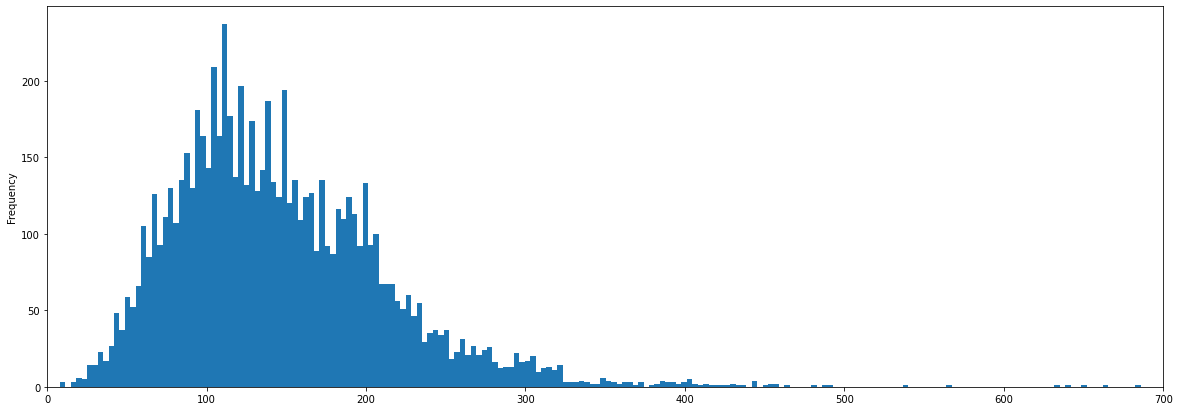

In [ ]:
#description lengths
fig = plt.figure(figsize = (20, 7))
df['len'].plot.hist(bins=200)
plt.xlim(0,700)

In [ ]:
#null values
df['description'].notnull().value_counts()

True     7394
False      17
Name: description, dtype: int64

In [ ]:
#meningles description 
import numpy as np
df.loc[df['len']<10,['description']] = np.nan

In [ ]:
df.loc[df['len']<10,['len']] = np.nan

In [ ]:
df['description'].notnull().value_counts()

True     7391
False      20
Name: description, dtype: int64

In [ ]:
df = df[df['description'].notnull()]

In [ ]:
for g in  genres_counts:
  print(g,'  : ',genres_counts[g])

Not   :  4000
IT   :  3411


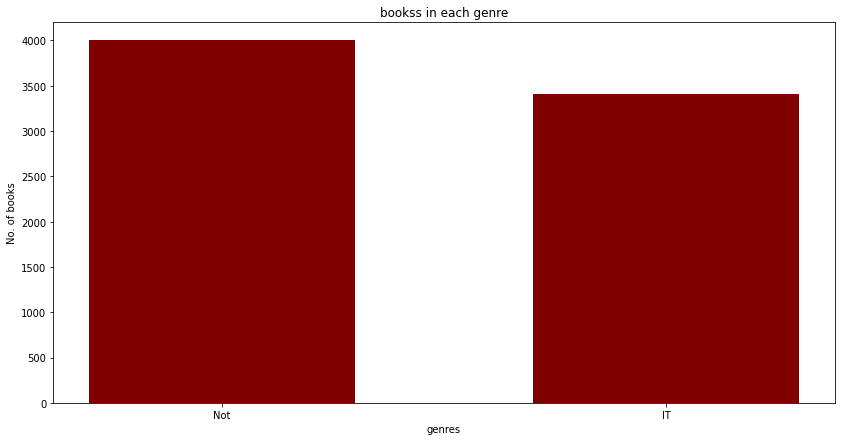

In [ ]:
# let plot those counts
genre = list(genres_counts.keys())
count = list(genres_counts.values())
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize = (14, 7))
 
# creating the bar plot
plt.bar(genre, count, color ='maroon',
        width = 0.6)
 
plt.xlabel("genres")
plt.ylabel("No. of books")
plt.title("bookss in each genre")
plt.show()

In [ ]:
import pickle
with open('/content/drive/My Drive/data_t.txt', 'wb') as f:
    pickle.dump( df,f)